# Protocolo de teleportación cuántica

### Importamos las herramientas necesarias:

In [1]:
import qiskit
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import math
from math import pi
import random
import matplotlib
%matplotlib inline

### Protocolo

El protocolo de teleportación describe la teleportación de información cuántica a través de la transmisión de información clásica. Específicamente, la teleportación de un qubit requiere de la transmisión de dos bits clásicos. Se usa el término "teleportación" debido a que no es el qubit el que es transmitido, de hecho una medición destruye la información contenida en él; sino que éste es reconstruido en otro sitio con base en la información contenida en los dos bits clásicos, los cuales sí fueron transmitidos.

Cabe destacar que el fenómeno clave para la construcción de este protocolo es el entrelazamiento cuántico.

In [2]:
# Parametros para definir el qubit a teleportar

theta = random.uniform(0, pi)
phi = random.uniform(0, 2*pi)
l = 0

In [3]:
# Definimos el circuito

qr = QuantumRegister(3)
crz, crx = ClassicalRegister(1), ClassicalRegister(1)
qc = QuantumCircuit(qr, crz, crx)

In [4]:
# Alice y Bob entrelazan un par de qubits

qc.h(1)
qc.cx(1,2)

qc.barrier([0,1,2])

In [5]:
# Alice inicializa el qubit a teleportar

qc.u3(theta,phi,l,0)

qc.barrier([0,1,2])

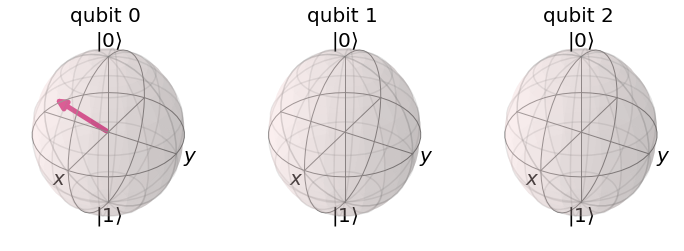

In [7]:
# Checamos el estado del qubit a teleportar (qubit 0)

state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()
out_state = result.get_statevector()
plot_bloch_multivector(out_state)

In [8]:
# "Desentrelazamiento" de los qubits de Alice

qc.cx(0,1)
qc.h(0)

qc.barrier([0,1,2])

In [9]:
# Medición de los qubits de Alice

qc.measure([0,1],[0,1])

qc.barrier([0,1,2])

In [11]:
# Con base en la información de los bits clásicos recibidos, Bob aplica las compuertas necesarias para recuperar el qubit.

qc.x(2).c_if(crx, 1)
qc.z(2).c_if(crz, 1)

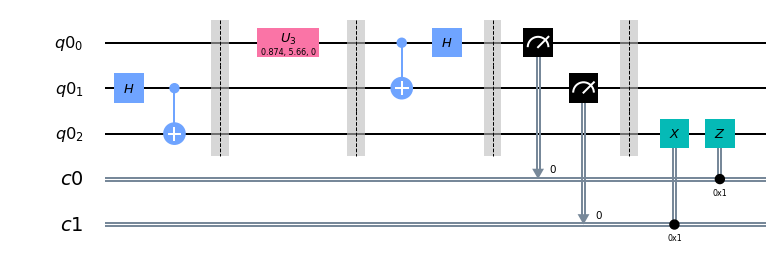

In [12]:
qc.draw(output = 'mpl')

In [13]:
# Ejecutamos el ciruito

state = Aer.get_backend('statevector_simulator')
result = execute(qc,state).result()

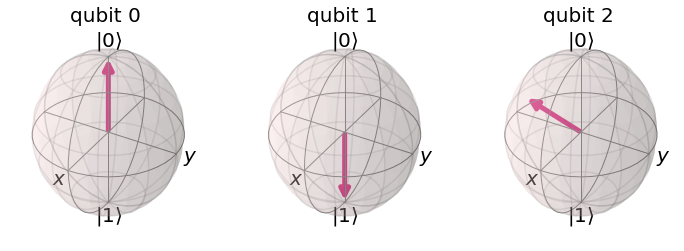

In [14]:
# Checamos el estado del qubit teleportado (qubit 2)

out_state = result.get_statevector()
plot_bloch_multivector(out_state)